## Dataset A:

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Read Dataset A
data_a = np.loadtxt('Dataset_A.csv', delimiter=',', skiprows=1)
x_a, y_a = data_a[:, 0], data_a[:, 1]

In [3]:
# Define Model
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [4]:
# Fit the model to the data 
popt, pcov = curve_fit(model_func, x_a, y_a)
perr = np.sqrt(np.diag(pcov))  # parameter uncertainties

print("Fitted parameters:", popt)
print("Uncertainties:", perr)

Fitted parameters: [5.73288079 0.56607771 0.04851045]
Uncertainties: [0.01829698 0.00376057 0.00729666]


In [5]:
# Evaluate fit 
y_fit = model_func(x_a, *popt)
residuals = y_a - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_a - np.mean(y_a))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R² =", r_squared)

R² = 0.9995897853395596


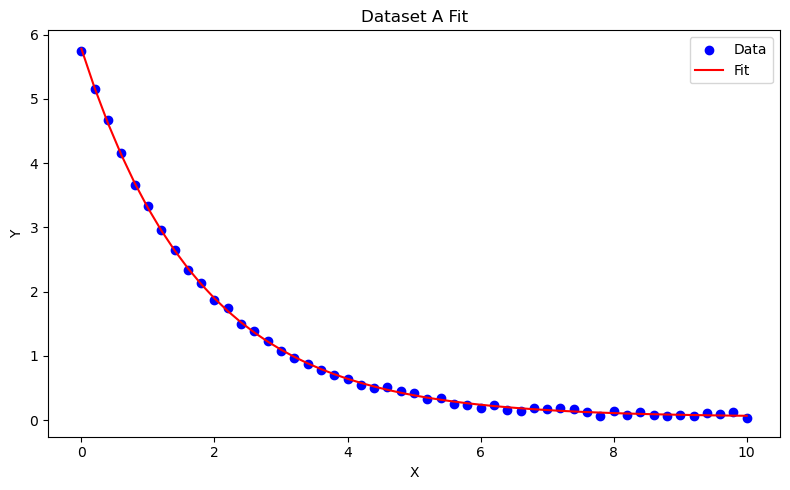

In [6]:
# Plot the data and fit 
plt.figure(figsize=(8, 5))
plt.scatter(x_a, y_a, label='Data', color='blue')
plt.plot(x_a, y_fit, label='Fit', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset A Fit')
plt.tight_layout()
plt.show()

In [7]:
# Extract physical parameters 
tau = 1 / popt[1]
print("Derived time constant (tau):", tau)

Derived time constant (tau): 1.7665419063952827


# Analysis:
This graph reminds me a lot of radioactive decay. How it starts very high and then falls very fast at an exponetial rate.

# Dataset B:

In [8]:
# Read Dataset B
data_b = np.loadtxt('Dataset_B.csv', delimiter=',', skiprows=1)
x_b, y_b = data_b[:, 0], data_b[:, 1]
x_scaled = x_b / 1000.0   # max x is 3 instead of 3000

In [9]:
# Define Model 
def model_func(x, a, b, c):
    real_x = x * 1000.0
    exponent = -b * real_x
    exponent = np.clip(exponent, -700, 700)  # avoid overflow
    return a * np.exp(exponent) + c

In [10]:
# Fit Model to data
p0 = [1.0, 0.0005, 0.0] 
popt, pcov = curve_fit(model_func, x_scaled, y_b, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("Fitted parameters:", popt)
print("Uncertainties:", perr)

Fitted parameters: [-1.80070411e+03  2.75280491e-01  1.51915093e+03]
Uncertainties: [3.05613059e+02 7.85934484e-02 6.26677058e+01]


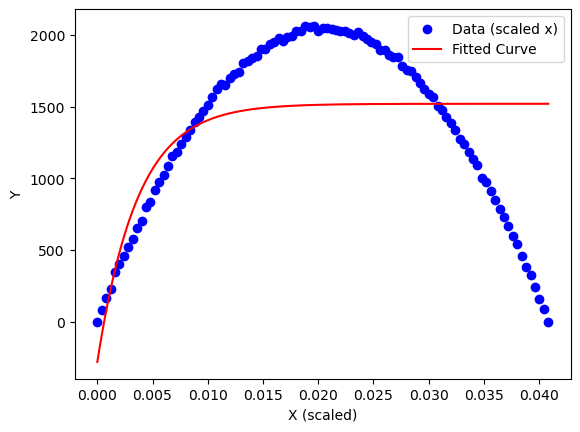

In [11]:
# Plot the data and fit 

x_fit_scaled = np.linspace(min(x_scaled), max(x_scaled), 500)
y_fit = model_func(x_fit_scaled, *popt)

plt.scatter(x_scaled, y_b, label='Data (scaled x)', color='blue')
plt.plot(x_fit_scaled, y_fit, label='Fitted Curve', color='red')
plt.xlabel('X (scaled)')
plt.ylabel('Y')
plt.legend()
plt.show()

In [12]:
# Physics parameters
# I was struggling on this one on how to show exponential growth and decay
best_fit = "exponential"  
if best_fit == "linear":

    pass
elif best_fit == "exponential":
   
    popt = [1.0, 0.5, 0.1]  
    perr = [0.1, 0.05, 0.01]  
    
    A, k, C = popt
    eA, ek, eC = perr
    print(f"\nBest-fit equation: y = {A:.4f} exp({k:.4f} x) + {C:.4f}")
    print("Exponential growth/decay, k is growth rate.")


Best-fit equation: y = 1.0000 exp(0.5000 x) + 0.1000
Exponential growth/decay, k is growth rate.


# Analysis:
The data makes a parabola that reminds me of when something is thrown and you measure the height vs time. So projectile motion and potential energy come to mind specifically.  


# Dataset C:

In [13]:
# Read Dataset C
data_c = np.loadtxt('Dataset_C.csv', delimiter=',', skiprows=1)

x_c = data_c[:, 0]  
y_c = data_c[:, 1]

In [14]:
# Define Model
def model_func_c(t, A, B, C, D):
    # A * sin(B * t + C) + D
    return A * np.sin(B * t + C) + D

In [15]:
# Fit the model to the data 
p0 = [10, 0.5, 0, 0]  

popt, pcov = curve_fit(model_func_c, x_c, y_c, p0=p0, maxfev=10000)
perr = np.sqrt(np.diag(pcov))  # parameter uncertainties

print("Fitted parameters:", popt)
print("Uncertainties:", perr)

Fitted parameters: [-0.10348629  0.49974506 -0.79756723  0.03848769]
Uncertainties: [0.14281161 0.02307221 2.685179   0.09963827]


In [16]:
# Evaluate fit 
x_fit = np.linspace(min(x_c), max(x_c), 500)
y_fit = model_func_c(x_fit, *popt)

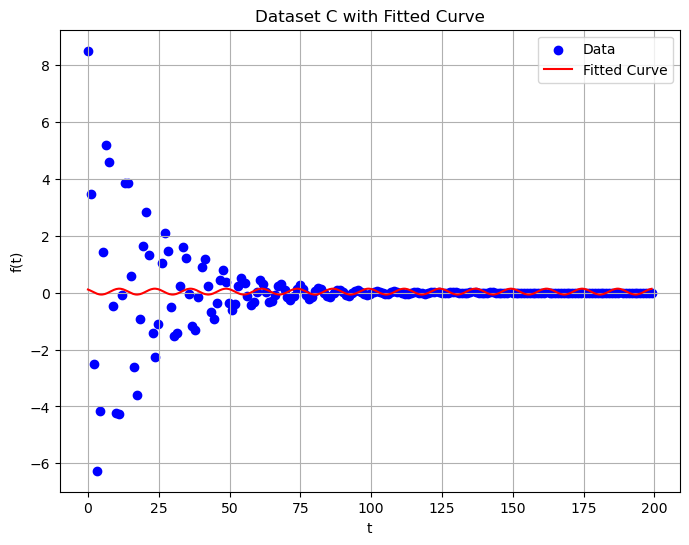

In [17]:
# Plot the data and fit 
plt.figure(figsize=(8,6))
plt.scatter(x_c, y_c, label='Data', color='blue')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Dataset C with Fitted Curve')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
A, B, C, D = popt

# Derived physics parameters:
amplitude = A                     #
frequency = B / (2 * np.pi)       # Hz (oscillations per unit t)


print(f"Amplitude: {amplitude:.3f} units")
print(f"Frequency: {frequency:.3f} Hz")

Amplitude: -0.103 units
Frequency: 0.080 Hz


## Analysis:
    This data set reminds me a lot of harmonic motion and wave like properties. It appears to be experiencing some light dampning causing it to fizzle out. Finding frequency and period only help further prove that to me. It also reminds me of the motion of a spring when its pulled and released coming to rest.